<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/Pandas_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Walmart.csv')
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [20]:
def profit_status(profit_value):
  if profit_value > 0:
    return 'green'
  else:
    return 'red'


df['Profit'].apply(profit_status)

0       green
1       green
2       green
3       green
4       green
        ...  
3198    green
3199    green
3200    green
3201    green
3202    green
Name: Profit, Length: 3203, dtype: object

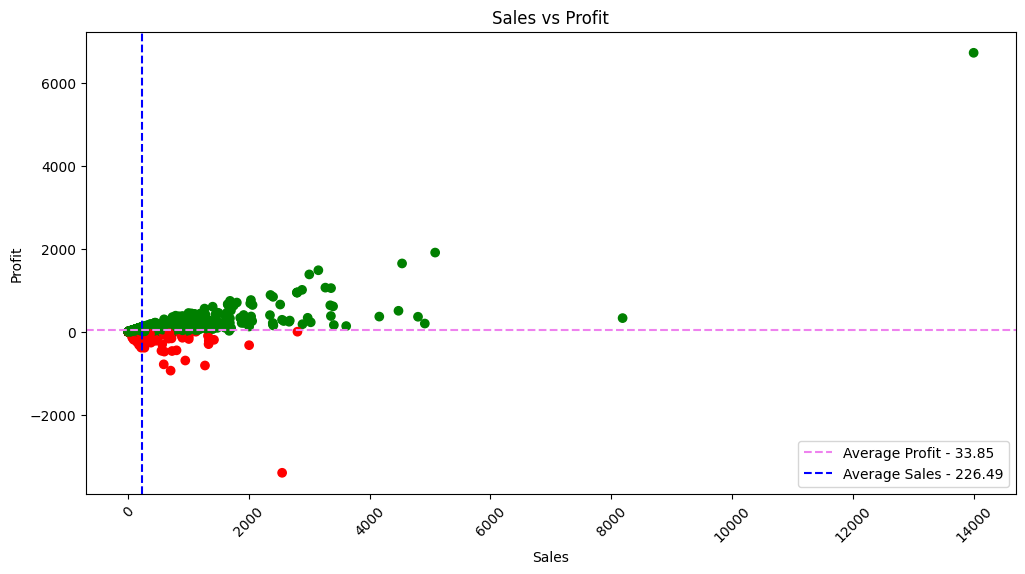

In [21]:
avg_profit = round(df['Profit'].mean(), 2)
avg_sales = round(df['Sales'].mean(), 2)

plt.figure(figsize=(12, 6))
plt.scatter(df['Sales'], df['Profit'], color =df['Profit'].apply(profit_status))


plt.axhline(y = av_profit , color = 'violet' , linestyle = '--' , label = f"Average Profit - {av_profit}")
plt.axvline(x = av_sales , color = 'blue' , linestyle = '--' , label = f"Average Sales - {av_sales}")

plt.legend()
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.xticks(rotation=45)


plt.show()

In [22]:
# different plot on basic categorical profit loss analysis

cat_profit_loss = df.groupby('Category')['Profit'].sum()
cat_profit_loss


# convert to proper data frame --> reset_index() method is used
cat_profit_loss = df.groupby('Category')['Profit'].sum().reset_index()
cat_profit_loss


,Category,Profit
0,Accessories,16484.62
1,Appliances,8261.29
2,Art,2374.15
3,Binders,16096.78
4,Bookcases,-1646.50
5,Chairs,4027.62
6,Copiers,19327.25
7,Envelopes,1908.71
8,Fasteners,275.19
9,Furnishings,7641.26


In [23]:
cat_profit_loss['Profit'].apply(lambda x: "red" if x < 0 else "green")

0     green
1     green
2     green
3     green
4       red
5     green
6     green
7     green
8     green
9     green
10    green
11      red
12    green
13    green
14    green
15    green
16    green
Name: Profit, dtype: object

In [24]:
# 1st way ->
def profit_color(profit_value):
  if profit_value < 0:
    return 'red'
  elif profit_value < 7000:
    return 'yellow'
  else:
    return 'green'

cat_profit_loss['Profit'].apply(profit_color)
cat_profit_loss

,Category,Profit
0,Accessories,16484.62
1,Appliances,8261.29
2,Art,2374.15
3,Binders,16096.78
4,Bookcases,-1646.50
5,Chairs,4027.62
6,Copiers,19327.25
7,Envelopes,1908.71
8,Fasteners,275.19
9,Furnishings,7641.26


In [25]:
# 2nd way -->

profit_color = lambda profit_value : "red" if profit_value < 0 else "yellow" if profit_value < 7000 else "green"
cat_profit_loss['Profit'].apply(profit_color)

0      green
1      green
2     yellow
3      green
4        red
5     yellow
6      green
7     yellow
8     yellow
9      green
10    yellow
11       red
12     green
13     green
14     green
15    yellow
16    yellow
Name: Profit, dtype: object

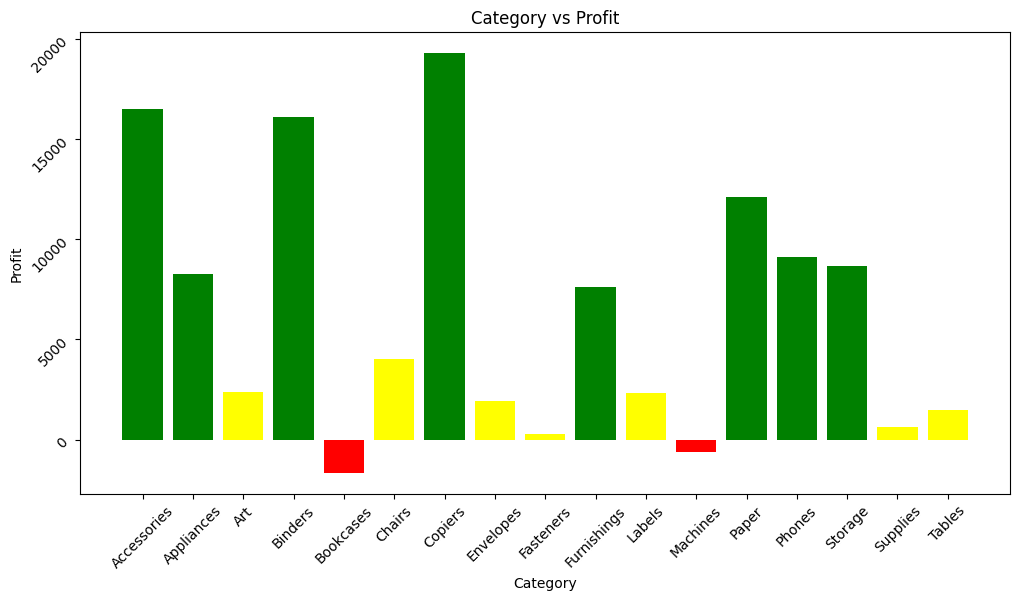

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(cat_profit_loss['Category'],cat_profit_loss['Profit'] , color = cat_profit_loss['Profit'].apply(profit_color))

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Category vs Profit')

plt.show()

In [27]:
# PIVOT TABLE ---> to print multiple things

df.head(3)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


In [28]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Customer Name     object
Country           object
City              object
State             object
Category          object
Product Name      object
Sales            float64
Quantity         float64
Profit           float64
dtype: object

In [38]:
df['ProcessingTime'] = df['ProcessingTime'].dt.days


KeyError: 'ProcessingTime'

In [37]:
# q.> Total sales, Total Quantity , Average profit , Average processing Time for each category --->

# df.groupby('Category')[['Sales','Quantity','Profit','ProcessingTime']].agg(['sum','mean'])

# 2nd way -->

table_cat = pd.pivot_table(data = df,
                           index = 'Category',
                           values = ['Sales','Quantity','Profit','ProcessingTime'],
                           aggfunc = { 'Sales': np.sum,
                                        'Quantity' : np.sum,
                                        'Profit' : np.mean,
                                        'ProcessingTime':np.mean})
table_cat

KeyError: 'ProcessingTime'

In [40]:
color_matrix = lambda value : 'red' if value < 0 else 'green'

color_values = table_category['Profit'].apply(color_matrix)

#color_values

NameError: name 'table_category' is not defined

In [ ]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.bar(table_category.index,table_category['Sales'],
        color = color_values)
plt.xticks(rotation = 90)
plt.title('Total Sales')

plt.subplot(2,2,2)
plt.bar(table_category.index,table_category['Quantity'],
        color = color_values)
plt.xticks(rotation = 90)
plt.title('Total Quantity')


plt.subplot(2,2,3)
plt.bar(table_category.index,table_category['Profit'],
        color = color_values)
plt.xticks(rotation = 90)
plt.title('Average Profit')


plt.subplot(2,2,4)
plt.bar(table_category.index,table_category['ProcessingTime'],
        color = color_values)
plt.xticks(rotation = 75)
plt.title('Average Processing Time')

plt.tight_layout()
plt.show()

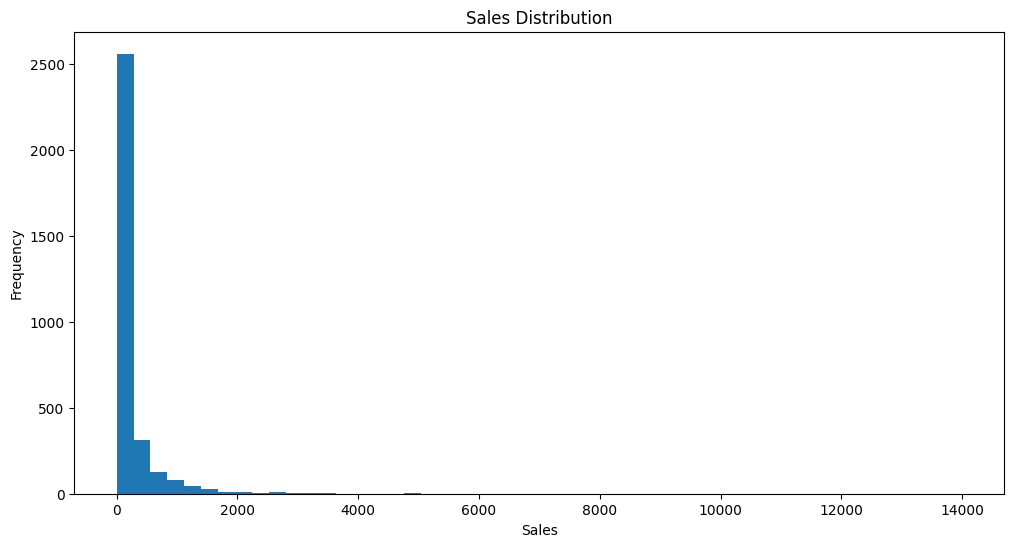

In [41]:
# Histogram plot --->

plt.figure(figsize = (12,6))
plt.hist(df['Sales'] , bins = 50)

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [42]:
(df['Sales']<=500).sum()/len(df)

0.8832344676865439

In [43]:
(df['Sales'] <= df['Sales'].mean()).sum()/len(df)

0.7589759600374649

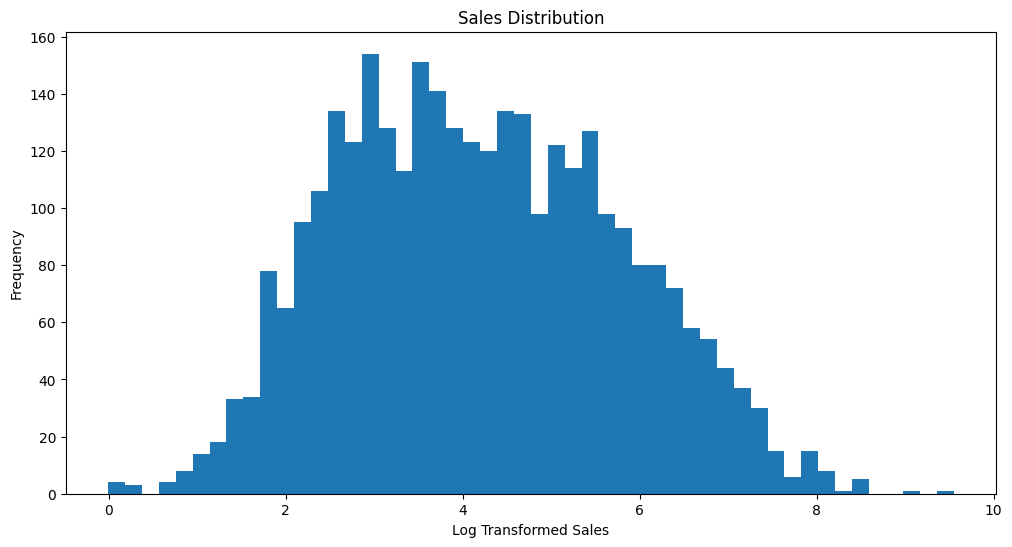

In [44]:
plt.figure(figsize = (12,6))
plt.hist(np.log(df['Sales']) , bins = 50)

plt.xlabel('Log Transformed Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [45]:
log_sales = np.log(df['Sales'])

(log_sales <= log_sales.mean()).sum()/len(df)

0.5179519200749297

In [46]:
# Statistics ---->
# Measure of central tendency - mean, median , mode
# Measure of Dispersion - standard deviation & variance

# ex - 1 -->
n1 = np.array([1,2,5,6,7])
print(np.mean(n1))
print(np.median(n1))

4.2
5.0


In [47]:
# ex - 2 -->
student_marks = np.array([22,17,28,30,20,26,37,16,26,22,19])
print(student_marks)
print(len(student_marks))
print(np.mean(student_marks))
print(np.median(student_marks))

[22 17 28 30 20 26 37 16 26 22 19]
11
23.90909090909091
22.0


In [48]:
variance_marks = ((student_marks - np.mean(student_marks))**2).mean()
variance_marks

35.53719008264463

In [49]:
std_deviation = np.sqrt(variance_marks)
std_deviation

5.961307749365455

In [50]:
# Using standard deviantion we find most likelihood region => Majority of data exist --->
# Calculate region of 1st standard deviation  --->

print(np.mean(student_marks) - std_deviation)
print(np.mean(student_marks) + std_deviation)

17.947783159725454
29.870398658456367


In [51]:
# Calculate region of 2nd standard deviation  ---->

print(np.mean(student_marks) - 2 * std_deviation)
print(np.mean(student_marks) + 2 * std_deviation)

11.98647541036
35.83170640782182


In [52]:
# Calculate region of 3rdd standard deviation --->

print(np.mean(student_marks) - 3 * std_deviation)
print(np.mean(student_marks) + 3 * std_deviation)

6.025167660994544
41.79301415718727


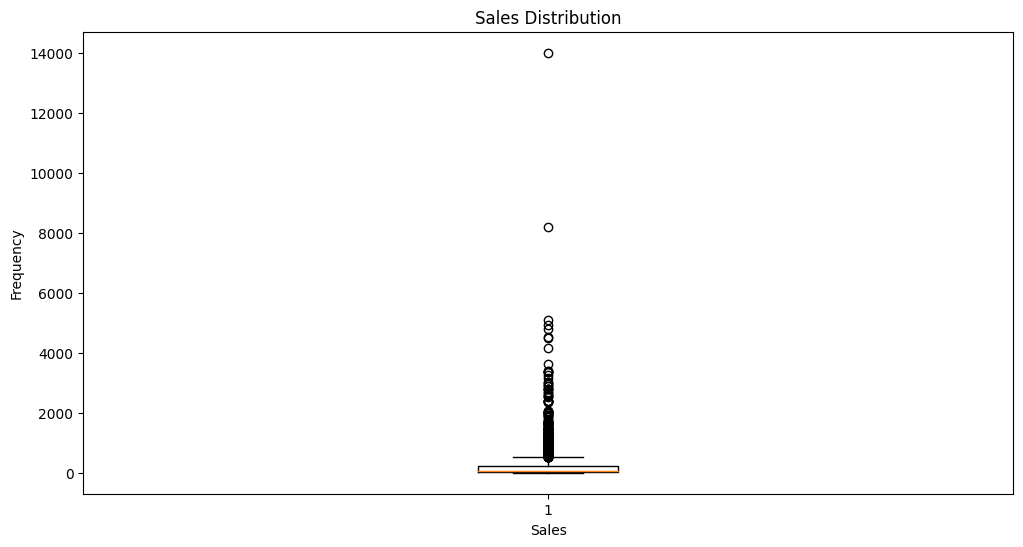

In [53]:
# BOX PLOT -->

plt.figure(figsize = (12,6))
plt.boxplot(df['Sales'])

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()


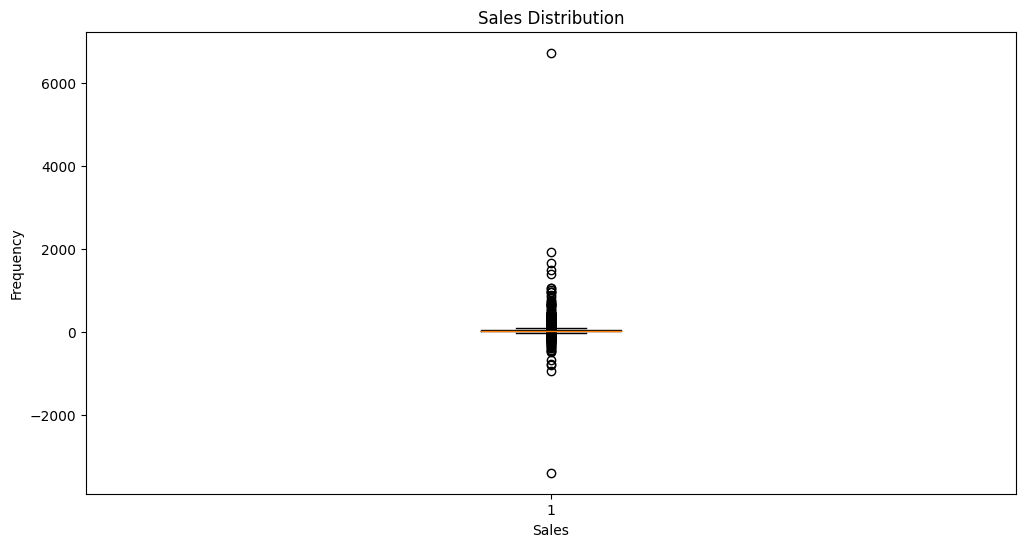

In [54]:
plt.figure(figsize = (12,6))
plt.boxplot(df['Profit'])

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [55]:
df['Profit'].describe()

count    3203.000000
mean       33.849138
std       174.109155
min     -3399.980000
25%         3.850000
50%        11.170000
75%        33.000000
max      6719.980000
Name: Profit, dtype: float64